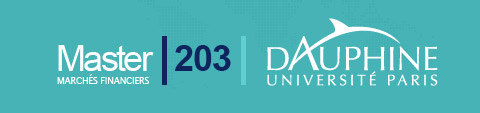

## LAB 2 rules

Assignment has to be done individually. Grades are between 0-20. The assignment counts for 50% of the final grade. You will be asked to build a whole machine learning pipeline and submit your predictions through the ENS data challenge competition interface. You will also have to submit your final notebook and relevant documents with regards to the following planning.

- **Competition start date** : **07 March 2022 15:30**
- **Submissions dead line** : **01 April 2022, 00:59**
- **Work and notebook submission** : **08 April 2022, 23:59**

Final work submissions are made by email at vienne.thibaud@gmail.com. Zip your whole project with underlying folders, notebook and possible report. Email subject should start with [203_lab2].

## Grades

Your work will be marked out of 20 according to 2 criteria :

- **Criteria 1 : Predictive model performance and ranking on ENS data challenge leaderboard ( / 7.5 points).**<br/>
- **Criteria 2 : Relevance of the reported notebook ( / 12.5 points).**<br/>

First criteria grade will be a mixture between your predictive model performance on the competition interface and your competition ranking. Criteria 2 refers to the submitted work relevance. At least you should provide a commented notebook but feel free to provide a small report. More precisely, second criteria grades will be assigned with regards to the following points : 

**Data exploration and features engineering ( / 4 pts)** : 

> - Richness of exploration, analysis and charts provided.<br/>
> - Relevance of interpretations and justifications provided.<br/>
> - Relevance of implemented features, justifications and interpretations in data cleaning and features engineering.
> - Personal initiatives.<br/>
> - Your conclusions for following steps.<br/>

**Machine learning pipeline ( / 6 pts)** : 
> - Relevance of implemented features, justifications and interpretations in machine learning algorithms.
> - Relevance of justifications and interpretations in models evaluation procedure, results and models diagnostic.
> - Personal initiatives.
> - Your conclusions.

**Notebook quality and participation ( / 2.5 pts)** : 

> - Code clearness (structure of the code, comments, written functions…)
> - Notebook clearness (structure of notebook, markdown...).
> - Participation on the forum.
> - ...

## Notebook description

This notebook will be used during the first 3 inclass hours of the competition. Using it, we will try to create a first supervised machine learning model to **recover missing values in financial time series**. Moreover,it can be used as a template to structure your work and so success this lab. It is composed of common machine learning steps :

**Step 0 - Prerequisites** : this is where you will code all your prerequisites including python modules to import and your own functions. It also covers the competition purpose and the description of data.<br/><br/>
**Step 1 - Exploration** : It is a common part in a machine learning pipeline. In this section, you will import datasets, discover the available features, provide some data mining observations, investigate missing values and possible outliers. You can also try to explore the dynamics behing the modelization. An exhaustive exploration is more likely to yield powerful predictive models.<br/><br/>
**Step 2 - Features Engineering** : According to conclusions you get from exploration, you will process the provided data (cleaning, create new features, features selection...).<br/><br/>
**Step 3 - Machine learning experiments** : In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.<br/><br/>
**Step 4 - Final run** : According to the previous steps results and your own interpretation, run your best machine learning algorithm and make predictions for the test set. Then export your results and make a submission on the ENS data challenge platform. Conclude.<br/><br/>

## How to success this lab?

- Be organized. Work on a regular basis. The lab 2 requires time to yield good results.
- Take time to explore data. It will help you to understand features and reach better scores.
- Ask yourself questions. Be critical with results you get.
- Diversify efforts on all parts of machine learning pipeline (exploration, cleaning, features engineering/selection, machine learning...).
- Take initiatives. Try and test! 
- Keep trusting in yourself! you have all the needed knowledge to success this assignement! :)

# Step 0 - Prerequisites 

## Aim of the competition

When computers are responsible for all trading decisions through algorithms, it is very important that their input data be of the best quality possible. However, sometimes values may be missing or contain outliers.

Futures contracts are a promise to deliver some underlying asset (let’s say cotton) at a given expiry date and at a predetermined price; they are for instance useful to a company for locking a price for a future time when they will need the underlying asset (it could be a garment manufacturer, for instance, for cotton).

The goal of this challenge is to recover missing values in financial time series covering 300 futures contracts.

## About data

Dimension : Less than 1,000,000 rows, including 200,000 bid-ask spreads to predict.


> - **product_id** and **liquidity_rank** define a unique futures contract. The dataset contains around 100 product_id (corresponding for instance to a specific type of crude oil). For each product_id several liquidity ranks can exist: liquidity_rank 0 refers to the contract with the closest expiry date (which is often the most traded one), 1 to the next contract to expire, etc. Thus, a contract of rank 1 becomes a contract of rank 0 when the previous contract of rank 0 expires.
> - **dt_close** represents the day number (they are therefore chronological) for each data sample. For a given dt_close there is 1 entry per (product_id, liquidity_rank) pair.
> - **dt_expiry** similarly represents the date of the futures contract expiry.
> - **normal_trading_day** is set to 0 when the market is closed or the market activity is reduced.
> - **open**, **close** represent contract prices, resp. at market opening and close.
> - **high**, **low** represent the highest and lowest price of the contract during the day.
> - **volume** is the number of contracts exchanged during the day, up to a factor that depends only on product_id.
> - **open_interest** is the number of active contracts at the end of the day, with the same factor applied as for the volume.
> **spread** is the “daily bid-ask spread”, which is the value we want to predict.
> **tick_size** is a proxy for 1 unit of spread (this is not directly price difference).
> - **fixed** is set to 1 when one or more features have been fixed for various reason (outliers, missing values…).

Prices are all normalized in some way (the values are thus not in currency units), but they are consistent within each product_id.

### Metric

**Root mean square error (RMSE)** between the predicted daily bid-ask spread and the real one, measured over every missing spread.

### Benchmark

Whereas classical time series problems only allow the use of past data for predictions, participants can exploit the complete time series “to fill the gap”.

A very simple benchmark would be:

> **df['spread'].interpolate(method='linear')**

## Load modules

In this cell, you can put all modules you use. You can use it to provide a clear code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Your functions

In order to have a clear code, you can put all your own functions in this cell.

In [ ]:
def export_ens(df_test, pred_test, save=True, path_save="y_test_prediction.csv"):
    """
    Export submissions with the good ENS data challenge format.
    df_test : (pandas dataframe) test set
    proba_test : (numpy ndarray) prediction as a numpy ndarray you get using method .predict()
    save : (bool) if set to True, it will save csv submission in path_save path.
    path_save : (str) path where to save submission.
    return : dataframe for submission
    """
    df_submit = pd.Series(pred_test[:,0], index=df_test.index, name="spread")
    df_submit.to_csv(path_save, index=True)
    return df_submit

def check_test(result, expected, display_error):
    """
    Testing your results.
    """
    if result == expected:
        print("1 test passed.")
    else:
        print(display_error)

# Step 1 - Data Exploration

Data exploration is a common part in a machine learning pipeline. In this section, you will import datasets, discover  features, provide data mining observations, investigate missing values and possible outliers. An exhaustive exploration is more likely to yield prowerful predictive models.

- Read the train dataset inputs and assign to the variable **df_train**.
- Read the train dataset labels and assign to the variable **y_train**.
- Read the test dataset inputs and assign to the variable **df_test**.
- Concat **df_train** and **y_train** to create **df_full**.
- Assign number of rows in train dataset and assign it to variable **n_rows_train**.
- Assign number of rows in test dataset and assign it to variable **n_rows_test**.

## Load datasets

In [ ]:
df_train = <FILL IN>
y_train = <FILL IN>
df_test = <FILL IN>
df_full = <FILL IN>
n_rows_train = <FILL IN>
n_rows_test = <FILL IN>

In [ ]:
check_test(n_rows_train, 629611, "wrong number of rows")
check_test(n_rows_test, 230304, "wrong number of rows")

## Take a look on first rows

Take a look on the **df_train** first 5 rows using method .head().

In [ ]:
<FILL IN>

Take a look on the **training targets** first 5 rows using method .head().

In [ ]:
<FILL IN>

## Set ID as index

the column **ID** is the identifier of the osbervations. It is used to retrieve a given prediction with its label. Let's set the column **ID** as the index of the dataframe with the method **set_index()**.

- Set the column **ID** as the index of **df_train**.
- Set the column **ID** as the index of **df_target_train**.
- Set the column **ID** as the index of **df_test**.

In [ ]:
df_train = df_train.set_index(<FILL IN>)
y_train = y_train.set_index(<FILL IN>)
df_test = df_test.set_index(<FILL IN>)

In [ ]:
check_test(df_train.shape[1], 13, "wrong number of columns")
check_test(y_train.shape, (629611, 1), "wrong number of columns")

## Look at the distribution of the target

Let's take a look on the column label (spread) in the train dataset. Take a look on the disribution of the label by plotting an histogram with matplotlib.

- Plot the histogram of the serie **y_train**. You can use the parameter **bins** to change the number of slots.
- Describe the serie **y_train** using the method **.describe()**.

In [ ]:
# Plot the histogram
<FILL IN>

# Describe the serie of label with the method .describe()
<FILL IN>

## Bid-ask spread with respect to the liquidity rank

_(Here is an example of data exploration + interpretation you can perform to understand your features)._

Very naively, one might think that there is a relationship between the bid-ask spread and the liquidity rank. To verify this hypothesis, we can visualize the boxplot distribution per category rank.

- Using seaborn function [**boxplot per category**](https://seaborn.pydata.org/generated/seaborn.boxplot.html), make the visualization.

In [ ]:
plt.figure(figsize=[15, 8])
ax = sns.boxplot(x=<FILL IN>, y=<FILL IN>, data=<FILL IN>)
plt.title("Distribution of the target per liquidity rank")
plt.show()

## Other things you can try

There are a lot ot experiments you can try to explore data. If you lack in ideas, here are some you can try :

- Understand features using statistical measures (mean, variance, std...) and visual charts.
- Try to understand the underlying relationship between the input features and the label. Make interpretations ! 
- Search for correlations between features and label.
- If any, investigate missing values and outliers.
- ...

However, feel completly free to provide your own analysis, exploration, interpretations and conclusions! Be creative!

# Step 2 - Features engineering and selection

According to the conclusions you get from step 1 exploration, process your data (features engineering, features selection, dimensionality reduction...). Feel free to create several different datasets if you want to explore different kind of dataframes.

## Compute the mean spread per product

_(Here is an example of fetures engineering + interpretation you can perform to understand your features)._

As seen above, there is a relationship between the bid-ask spread, the product and the liquidity rank. We will use past and future observations to retrieve the bid-ask spreads.

- Create the mean target per product by grouping observations on product and liquidity rank on **df_full**.
- Add a new column **mean_target_per_product** to train and test datasets using the merge function.

In [ ]:
# compute mean_target_per_product
mean_target_per_product = df_full.groupby(<FILL IN>).<FILL IN>
mean_target_per_product.name = "mean_target_per_product"

# merge on df_train and df_test
df_train = df_train.merge(mean_target_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])
df_test = df_test.merge(mean_target_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])

In [ ]:
df_train

## Features selection

Before running a machine learning algorithm, we have to select the features relevant with our modelization.
- In this section, select a set of features you want to use in your machine learning pipeline. Assign this list in the variable **features**. For example, you can start with features ["liquidity_rank", "normal_trading_day", "open_interest", "mean_target_per_product"].
- Make sure that you have removed the feature **ID** from this list as it is not relevant for the model.

Note : You can access a dataframe columns using the dataframe's attribute **.columns**

In [ ]:
features = <FILL IN>

In [ ]:
check_test("ID" not in features, True, "error : column ID still in the features.")

## Other things you can try

There are a lot ot experiments you can try to process your data. If you lack in ideas, here are some you can try :

- Create new insights from the raw data. 
- Perform features selection / dimensionality reduction to enhance the features.
- ...

Once again, feel completly free to provide your own process, interpretations and conclusions...

# Step 3 - Machine learning algorithms experiments

In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.

## Validation procedure

In this section, we will split our dataset into a train set and a validation set. Asn an example, we will use the simple **train_test_split** approach. However, you are free to choose the validation procedure. Justify your choices.

- Using the train-test split approach, split your train dataframe. Assign the resulting dataframes to variables **x_train**, **x_val**, **y_train** and **y_val**.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = <FILL IN>
x_test = <FILL IN>

## Vanilla linear regression

Let us test a first linear regression model with default parameters and all the features.

- Train a simple linear regression and assign the resulting model to the variable **model**.
- Use the model to make predictions on the train set samples. Assign the resulting serie to **pred_train**.
- Use the model to make predictions on the validation set samples. Assign the resulting serie to **pred_val**.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = <FILL IN>
model = <FILL IN>
pred_train = <FILL IN>
pred_val = <FILL IN>

## Evaluate the results of the vanilla linear regression

Classification metrics for this lab is the MSE (Mean Squared Error). Sklearn provides an implementation of this metrics [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). According to you, are you in an underfitting or an overfitting situation?

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = <FILL IN>
rmse_val = <FILL IN>

print("RMSE score on train dataset : %s" % rmse_train)
print("RMSE score on validation dataset : %s" % rmse_val)

## Other things you can try

Once again, there are a lot ot experiments you can try. If you lack in ideas, here are some you can try :

- Test multiple machine learning algorithms we have seen during the lectures.
- Test different combinations of hyperparameters. tune your model.
- Test different sets of features. Use your own features.
- Interpret your results with regards to the underfitting-overfitting tradeoff.
- Look at residuals. Plot learning curves.
- Search for the optimal set of hyperparameters. 
- Provide interpretations.
- user eXplainable AI (XAI) techniques to understand and interpret your models.
- Improve the validation prodedure.
- ...

It is good to test different machine learning algorithms and configurations. Some algorithms are more suited than others depending of use-case. Moreover, learning is really sensitive to hyperparameters you provide. Exploring your results by learning curves will help you diagnose your models. Time to apply what you have learned during lectures! 

# Step 4 - Final run

According to previous steps results and your own interpretation, run your best machine learning algorithm and make  predictions on the test set. Then export your results in and make submission on Kaggle platform.

## Run your best model and make prediction on test set

For this first experiment, use the vanilla linear regresson we have experimented in step 3. Make predictions on the test set and assign the results to variable **pred_test**.

In [ ]:
from sklearn.linear_model import LinearRegression
from math import sqrt

reg = <FILL IN>
model = <FILL IN>
pred_train = <FILL IN>
pred_val = <FILL IN>
pred_test = <FILL IN>

In [ ]:
check_test(pred_test.shape, (230304, 1), "wrong shape for pred test")

## Evaluate best model

Our best machine learning algorithm yields the following results : 

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = <FILL IN>
rmse_val = <FILL IN>

print("RMSE score on train dataset : %s" % rmse_train)
print("RMSE score on validation dataset : %s" % rmse_val)

## Interpretation

-> Your interpretation may go here.

## Export submission to ENS data challenge

You can export your predictions as a submission file using function export_ens() defined earlier in the notebook. Then go on ENS data challenge competition page and submit your predictions. Your can observe your performance on the leaderboard page.

In [ ]:
df_submit = export_ens(df_test, pred_test, True, "../results/my_first_submission.csv")

## Conclusion

You can write your work conclusion in this cell..

## Other things you can try

If you lack in ideas, here are some you can try :

- Evaluate final model on train, validation and test set. Diagnose your model results.
- Take a look on features importances.
- Provide a conclusion;
- ...

Feel free to provide your own interpretations and justifications. Here is your notebook and work !